In [92]:
import pandas as pd

df = pd.read_csv('time_series.csv',encoding = 'cp949')

In [110]:
time = df.query('단지 == "월곡두산위브"').iloc[:,2:]
time

,Date,price
214737,2010-01-01,505.08
214738,2010-02-01,511.76
214739,2010-03-01,462.19
214740,2010-04-01,448.01
214741,2010-05-01,496.99
...,...,...
214858,2020-02-01,802.61
214859,2020-03-01,797.20
214860,2020-04-01,839.09
214861,2020-05-01,803.49


In [111]:
time = time.set_index('Date')

In [94]:
train = df.query('단지 == "월곡두산위브"').iloc[:-18,2:].set_index('Date')
test = df.query('단지 == "월곡두산위브"').iloc[-18:,2:].set_index('Date')

In [14]:
train

,mean_price
Date,
2010-01-01,505.08
2010-02-01,511.76
2010-03-01,462.19
2010-04-01,448.01
2010-05-01,496.99
...,...
2018-08-01,629.37
2018-09-01,733.16
2018-10-01,854.40


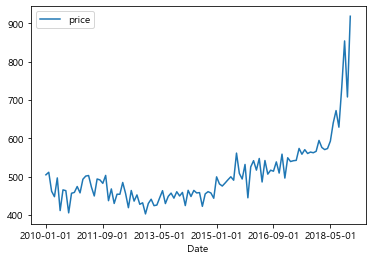

In [95]:
train.plot()

In [96]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [97]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train)

(0.99, True)

In [98]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'Malgun Gothic')

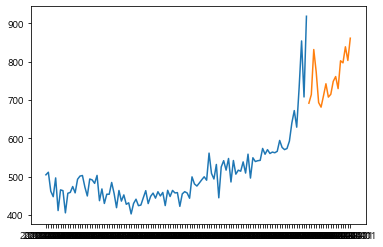

In [100]:
plt.plot(train)
plt.plot(test)
plt.show()

In [101]:
arima_model = auto_arima(train, start_p = 0, d = 1, start_q = 0,
                         max_p = 5, max_d = 5, max_q = 5, start_P = 0,
                         D = 1, start_Q = 0, max_P = 5, max_D = 5,
                         max_Q = 5, m = 12, seasonal = True,
                         error_action = 'warn', trace = True,
                         supress_warnings = True, stepwise = True,
                         random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1032.563, BIC=1037.671, Time=0.022 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=979.047, BIC=989.263, Time=0.395 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=983.466, BIC=993.682, Time=0.321 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.131, BIC=1033.685, Time=0.016 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=997.164, BIC=1004.825, Time=0.078 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=980.582, BIC=993.351, Time=1.050 seconds
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=979.073, BIC=991.842, Time=0.478 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=977.497, BIC=987.712, Time=0.274 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(1,1,0)x(0,1,2,12) [intercept=True]; AIC=979.230, BIC=991.999, Time=0.957 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(1,1,0)x(1,1,2,12) [intercept=True]; AIC=980.112, BIC=995.435, Time=1.563 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=1016.336, BIC=1023.998, Time=0.156 seconds
Fit ARIMA(2,1,0)x(0,1,1,12) [intercept=True]; AIC=971.843, BIC=984.612, Time=0.366 seconds
Fit ARIMA(2,1,0)x(0,1,0,12) [intercept=True]; AIC=990.203, BIC=1000.418, Time=0.190 seconds
Fit ARIMA(2,1,0)x(1,1,1,12) [intercept=True]; AIC=973.814, BIC=989.137, Time=0.762 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(2,1,0)x(0,1,2,12) [intercept=True]; AIC=973.823, BIC=989.147, Time=1.222 seconds
Fit ARIMA(2,1,0)x(1,1,0,12) [intercept=True]; AIC=975.503, BIC=988.272, Time=0.367 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(2,1,0)x(1,1,2,12) [intercept=True]; AIC=975.201, BIC=993.078, Time=1.954 seconds
Fit ARIMA(3,1,0)x(0,1,1,12) [intercept=True]; AIC=971.227, BIC=986.550, Time=0.410 seconds
Fit ARIMA(3,1,0)x(0,1,0,12) [intercept=True]; AIC=990.337, BIC=1003.106, Time=0.232 seconds
Fit ARIMA(3,1,0)x(1,1,1,12) [intercept=True]; AIC=973.214, BIC=991.091, Time=0.763 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(3,1,0)x(0,1,2,12) [intercept=True]; AIC=973.217, BIC=991.094, Time=1.669 seconds
Fit ARIMA(3,1,0)x(1,1,0,12) [intercept=True]; AIC=976.214, BIC=991.537, Time=0.434 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit ARIMA(3,1,0)x(1,1,2,12) [intercept=True]; AIC=974.955, BIC=995.386, Time=2.628 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=972.382, BIC=990.259, Time=0.565 seconds
Fit ARIMA(3,1,1)x(0,1,1,12) [intercept=True]; AIC=971.337, BIC=989.214, Time=0.832 seconds
Fit ARIMA(2,1,1)x(0,1,1,12) [intercept=True]; AIC=972.192, BIC=987.515, Time=0.506 seconds
Fit ARIMA(4,1,1)x(0,1,1,12) [intercept=True]; AIC=973.299, BIC=993.730, Time=1.114 seconds
Total fit time: 19.350 seconds


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  108
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -479.613
Date:                              Wed, 22 Jul 2020   AIC                            971.227
Time:                                      20:22:25   BIC                            986.550
Sample:                                           0   HQIC                           977.419
                                              - 108                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0144      2.316      1.733      0.083      -0.526       8.555
ar.L1         -0.7527      0.117     -6.411      0.000      -0.983      -0.523
ar.L2         -0.1851      0.134     -1.379      0.168      -0.448       0.078
ar.L3          0.1885      0.149      1.264      0.206      -0.104       0.481
ma.S.L12      -0.7334      0.198     -3.696      0.000      -1.122      -0.344
sigma2      1278.6898    206.847      6.182      0.000     873.278    1684.102
===================================================================================
Ljung-Box (Q):                       18.93   Jarque-Bera (JB):               105.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                             1.28
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
import statsmodels.api as sm
import warnings
import itertools

In [113]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [114]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(time,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1935.2951235565506
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1640.6514108875106
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1309.8493067296718
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1181.6552372881877


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1302.1736123316402
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1284.5172461145823
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1192.3988777566797


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1183.6402440963948
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1773.9919843879154


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1513.690480982979
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1274.4870512183154


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1145.370943564344


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1286.4468428025318


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1248.6102558579346
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1164.2772757181524


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1141.3033561992727
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1316.6986000737766
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1193.4392758645592


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1274.185065682268


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1094.100031011759
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1203.7256885909412
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1195.288267871111


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1095.8383726985041
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1087.917678081171
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1261.2501575115762


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1144.242340590319
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1223.746802658257


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1046.0071137359605
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1163.6750667484


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1146.2026065943264


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1061.9266435514726


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1042.2198727548798
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1328.208013978189


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1205.335581795081
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1263.2715867540571


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1103.74421644236


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1205.4952726758477


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1224.8398393993884
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1092.4077238692844


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1094.0060904362424
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1269.4847311059764


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1150.8615038662479
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1233.6832490190964


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1056.2561977082196


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1160.6981526277884


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1186.7672756117738


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1063.638563016288


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1053.6544118673883
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1274.0598688005164


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1154.9417321876024
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1240.7668168413347


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1059.1543912600607
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1154.8709903766867


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1156.870266904958
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1057.054571031266

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1056.4109096084555
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1256.9922794671409


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1140.1648493592043
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1222.1466119945517


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1042.9959853435216
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1149.8390172339564


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1142.1621722251755


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1051.6903998853813


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1040.2842293787603


In [115]:
mod = sm.tsa.statespace.SARIMAX(time,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3079      0.087     -3.524      0.000      -0.479      -0.137
ma.L1         -0.4088      0.097     -4.234      0.000      -0.598      -0.220
ar.S.L12      -0.5423      0.234     -2.315      0.021      -1.002      -0.083
ma.S.L12      -0.3627      0.202     -1.795      0.073      -0.759       0.033
sigma2      1910.0979    239.195      7.986      0.000    1441.285    2378.911


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


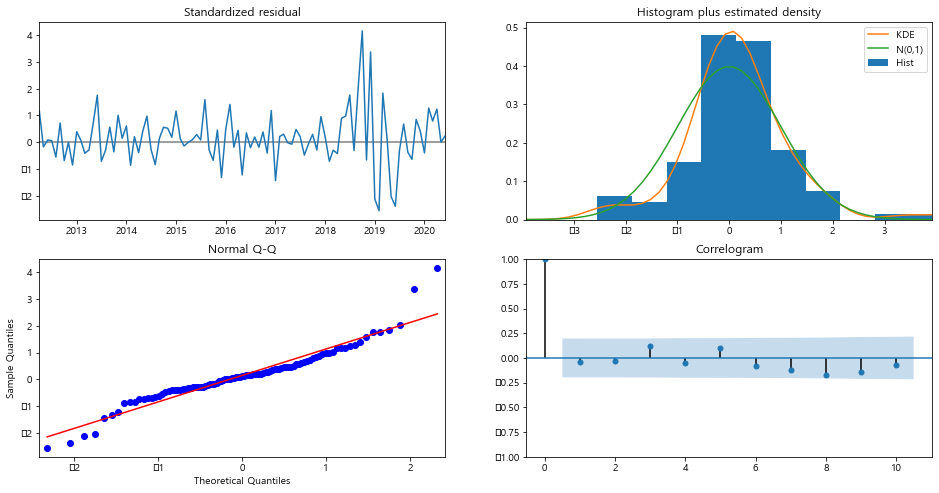

In [116]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

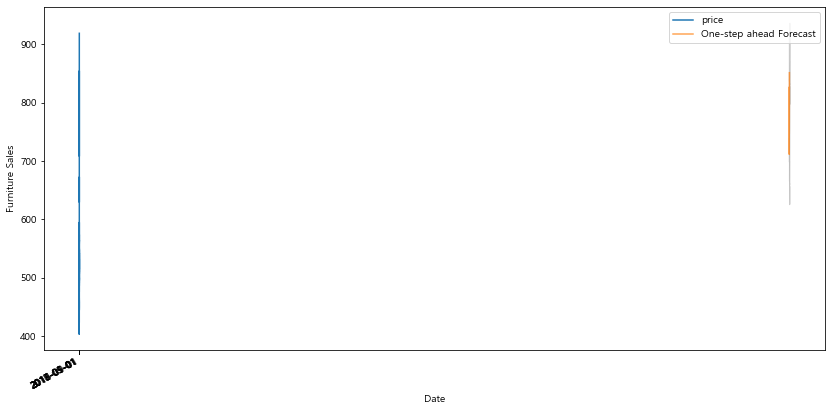

In [117]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산
ax = train['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [118]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 18),index = test.index)
prediction.columns = ['predict']
prediction

,predict
Date,
2019-01-01,831.661428
2019-02-01,860.561692
2019-03-01,909.533764
2019-04-01,864.286498
2019-05-01,909.449364
2019-06-01,930.790695
2019-07-01,930.536149
2019-08-01,952.614667
2019-09-01,968.690237


C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


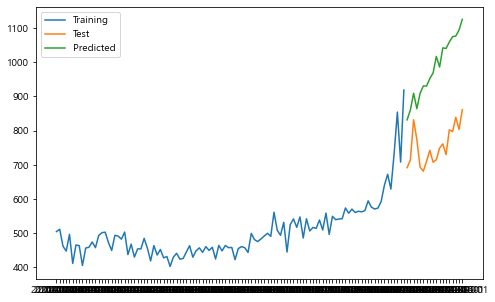

In [119]:
plt.figure(figsize = (8,5))
plt.plot(train,label = 'Training')
plt.plot(test,label = 'Test')
plt.plot(prediction,label = 'Predicted')
plt.legend(loc = 'Left corner')
plt.show()

In [121]:
from sklearn.metrics import r2_score
test['predict'] = prediction
r2_score(test['price'],test['predict'])

-18.08667621037852

In [123]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(time['price'], order=(1,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  125
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.228
Method:                       css-mle   S.D. of innovations             38.585
Date:                Wed, 22 Jul 2020   AIC                           1276.456
Time:                        20:30:31   BIC                           1287.770
Sample:                    02-01-2010   HQIC                          1281.052
                         - 06-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7253      1.607      1.696      0.090      -0.425       5.875
ar.L1.D.price    -0.3208      0.120     -2.675      0.007      -0.556      -0.086
ma.L1.D.price    -0.3893      0.108     

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [124]:
model = ARIMA(time['price'], order=(1,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  125
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -635.588
Method:                       css-mle   S.D. of innovations             39.011
Date:                Wed, 22 Jul 2020   AIC                           1277.175
Time:                        20:30:43   BIC                           1285.660
Sample:                    02-01-2010   HQIC                          1280.622
                         - 06-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.price    -0.3323      0.119     -2.783      0.005      -0.566      -0.098
ma.L1.D.price    -0.3569      0.107     -3.333      0.001      -0.567      -0.147
                                    Root

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


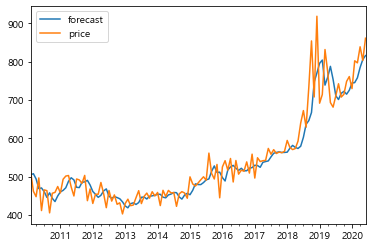

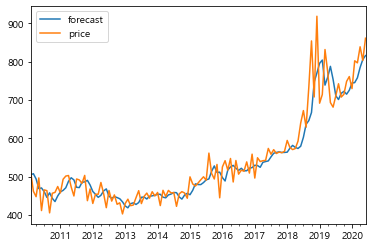

In [125]:
model_fit.plot_predict()

In [129]:
model_fit.predict(n_periods = 18)

TypeError: predict() got an unexpected keyword argument 'n_periods'

In [126]:
fore = model_fit.forecast(steps=2)
print(fore)

(array([826.05920134, 837.8447263 ]), array([39.01138596, 40.85281036]), array([[749.59828988, 902.52011281],
       [757.77468933, 917.91476326]]))


In [67]:
826.05920134*84.56

69851.5660653104

In [68]:
a = 6700/59.86
a*84.56

9464.617440694956

In [69]:
x/5*84.56

73315.72819437663

In [63]:
x = 67000/59.86 + 72200/84.65 + 77000/84.84 + 85000/114.75 + 82000/114.75

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


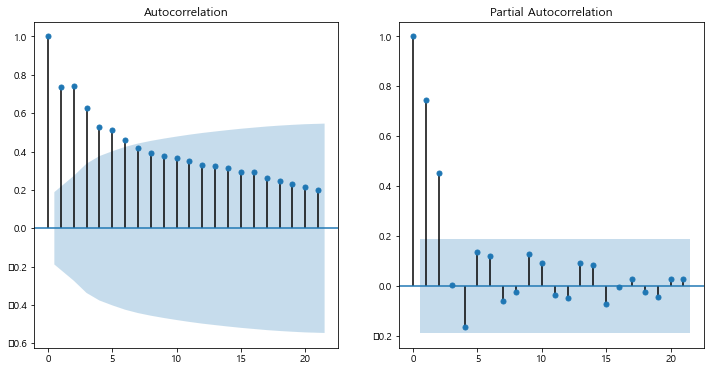

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
plot_acf(train,ax = ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(train,ax = ax2)

plt.show()

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


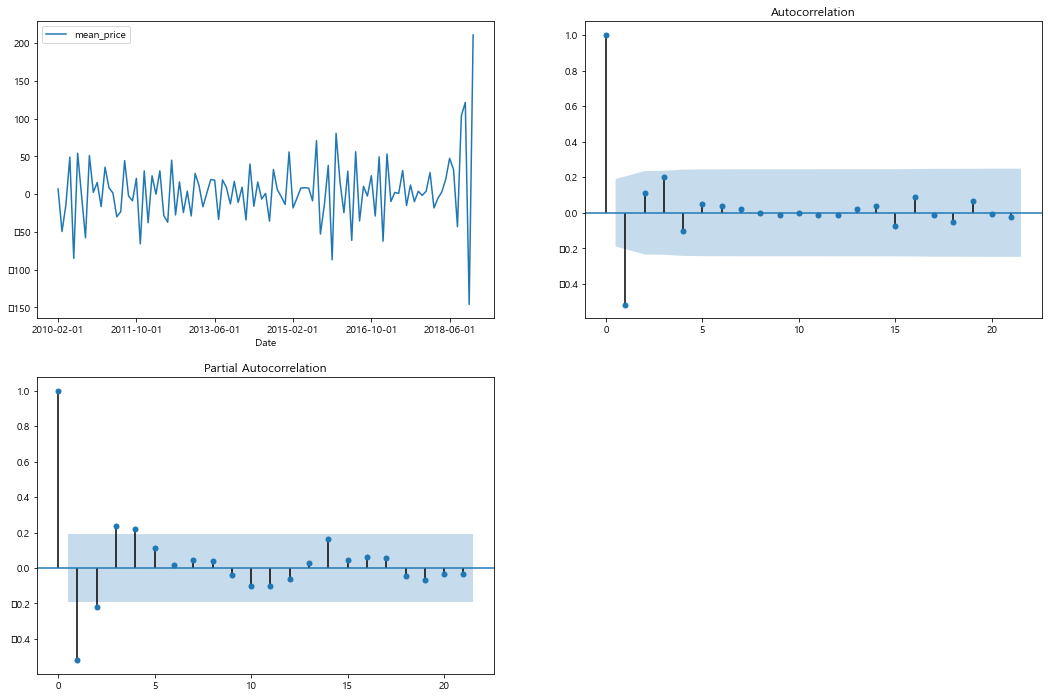

In [76]:
diff_1 = train.diff(periods=1).iloc[1:]

plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1)
diff_1.plot(ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_acf(diff_1, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_pacf(diff_1, ax = ax3)


plt.show()

In [80]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(0,1,2))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.mean_price   No. Observations:                  107
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -527.310
Method:                       css-mle   S.D. of innovations             33.312
Date:                Wed, 22 Jul 2020   AIC                           1062.620
Time:                        17:08:32   BIC                           1073.311
Sample:                    02-01-2010   HQIC                          1066.954
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2788      2.225      1.473      0.141      -1.083       7.641
ma.L1.D.mean_price    -0.7301      0.091     -7.996      0.000      -0.909      -0.551
ma.L2.D.mean_price  

In [81]:
model = ARIMA(train, order=(0,1,2))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.mean_price   No. Observations:                  107
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -528.347
Method:                       css-mle   S.D. of innovations             33.637
Date:                Wed, 22 Jul 2020   AIC                           1062.693
Time:                        17:08:54   BIC                           1070.712
Sample:                    02-01-2010   HQIC                          1065.944
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ma.L1.D.mean_price    -0.7134      0.091     -7.855      0.000      -0.891      -0.535
ma.L2.D.mean_price     0.4311      0.078      5.562      0.000       0.279       0.583
                    

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


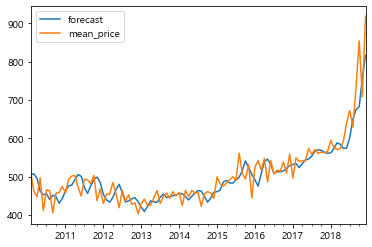

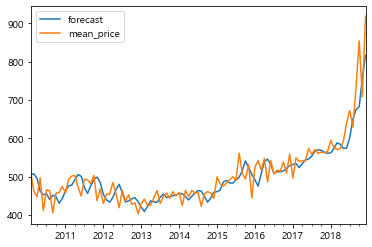

In [85]:
model_fit.plot_predict()

In [91]:
pd.DataFrame(model.predict(n_periods = 18))

TypeError: predict() got an unexpected keyword argument 'n_periods'

In [86]:
model.predict

<bound method ARIMA.predict of <statsmodels.tsa.arima_model.ARIMA object at 0x000001FFC9B654A8>>

In [83]:
model_fit

In [84]:
fore = model_fit.forecast(steps=3)
print(fore)

(array([825.18858938, 869.06729509, 869.06729509]), array([33.63686596, 34.99090091, 42.51067837]), array([[759.26154354, 891.11563523],
       [800.48638953, 937.64820066],
       [785.74789653, 952.38669366]]))
